In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

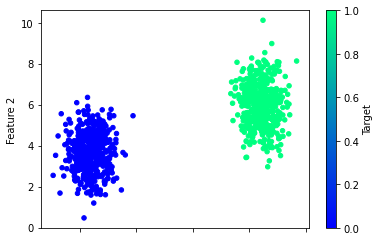

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 334us/step - loss: 0.9783 - accuracy: 0.1653
Epoch 2/100
24/24 [==============================] - 0s 292us/step - loss: 0.9412 - accuracy: 0.1933
Epoch 3/100
24/24 [==============================] - 0s 292us/step - loss: 0.9078 - accuracy: 0.2267
Epoch 4/100
24/24 [==============================] - 0s 292us/step - loss: 0.8795 - accuracy: 0.2693
Epoch 5/100
24/24 [==============================] - 0s 292us/step - loss: 0.8554 - accuracy: 0.2853
Epoch 6/100
24/24 [==============================] - 0s 334us/step - loss: 0.8347 - accuracy: 0.3093
Epoch 7/100
24/24 [==============================] - 0s 292us/step - loss: 0.8155 - accuracy: 0.3347
Epoch 8/100
24/24 [==============================] - 0s 334us/step - loss: 0.7990 - accuracy: 0.3627
Epoch 9/100
24/24 [==============================] - 0s 334us/step - loss: 0.7847 - accuracy: 0.3827
Epoch 10/100
24/24 [==============================] - 0s 292us/step - loss: 0.7724 - accura

24/24 [==============================] - 0s 292us/step - loss: 0.2795 - accuracy: 0.9293
Epoch 82/100
24/24 [==============================] - 0s 334us/step - loss: 0.2742 - accuracy: 0.9293
Epoch 83/100
24/24 [==============================] - 0s 292us/step - loss: 0.2690 - accuracy: 0.9307
Epoch 84/100
24/24 [==============================] - 0s 250us/step - loss: 0.2638 - accuracy: 0.9333
Epoch 85/100
24/24 [==============================] - 0s 292us/step - loss: 0.2586 - accuracy: 0.9387
Epoch 86/100
24/24 [==============================] - 0s 292us/step - loss: 0.2533 - accuracy: 0.9440
Epoch 87/100
24/24 [==============================] - 0s 292us/step - loss: 0.2481 - accuracy: 0.9467
Epoch 88/100
24/24 [==============================] - 0s 292us/step - loss: 0.2430 - accuracy: 0.9467
Epoch 89/100
24/24 [==============================] - 0s 292us/step - loss: 0.2378 - accuracy: 0.9480
Epoch 90/100
24/24 [==============================] - 0s 292us/step - loss: 0.2326 - accuracy: 

<AxesSubplot:>

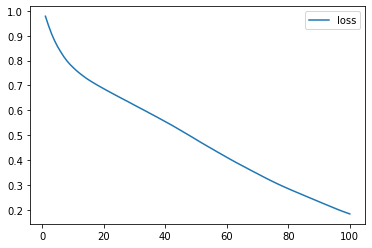

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

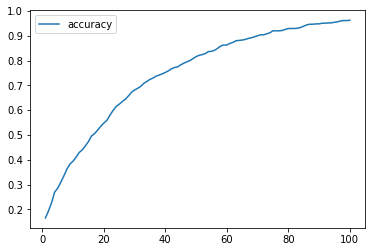

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1662 - accuracy: 0.9640
Loss: 0.16619068384170532, Accuracy: 0.9639999866485596


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

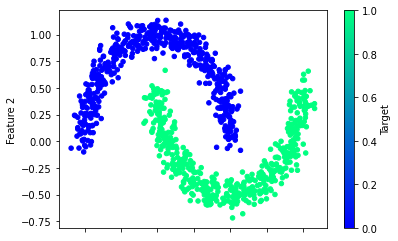

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 799us/step - loss: 1.7774 - accuracy: 0.2640
Epoch 2/100
24/24 [==============================] - 0s 459us/step - loss: 1.5447 - accuracy: 0.2813
Epoch 3/100
24/24 [==============================] - 0s 459us/step - loss: 1.3762 - accuracy: 0.2920
Epoch 4/100
24/24 [==============================] - 0s 459us/step - loss: 1.2592 - accuracy: 0.3027
Epoch 5/100
24/24 [==============================] - 0s 459us/step - loss: 1.1716 - accuracy: 0.3293
Epoch 6/100
24/24 [==============================] - 0s 459us/step - loss: 1.1031 - accuracy: 0.3440
Epoch 7/100
24/24 [==============================] - 0s 417us/step - loss: 1.0489 - accuracy: 0.3547
Epoch 8/100
24/24 [==============================] - 0s 459us/step - loss: 1.0033 - accuracy: 0.3840
Epoch 9/100
24/24 [==============================] - 0s 417us/step - loss: 0.9652 - accuracy: 0.3960
Epoch 10/100
24/24 [==============================] - 0s 459us/step - loss: 0.9324 - accura

24/24 [==============================] - 0s 459us/step - loss: 0.4821 - accuracy: 0.7680
Epoch 82/100
24/24 [==============================] - 0s 459us/step - loss: 0.4797 - accuracy: 0.7667
Epoch 83/100
24/24 [==============================] - 0s 417us/step - loss: 0.4773 - accuracy: 0.7707
Epoch 84/100
24/24 [==============================] - 0s 459us/step - loss: 0.4749 - accuracy: 0.7747
Epoch 85/100
24/24 [==============================] - 0s 459us/step - loss: 0.4725 - accuracy: 0.7760
Epoch 86/100
24/24 [==============================] - 0s 459us/step - loss: 0.4700 - accuracy: 0.7760
Epoch 87/100
24/24 [==============================] - 0s 417us/step - loss: 0.4677 - accuracy: 0.7787
Epoch 88/100
24/24 [==============================] - 0s 459us/step - loss: 0.4653 - accuracy: 0.7813
Epoch 89/100
24/24 [==============================] - 0s 459us/step - loss: 0.4629 - accuracy: 0.7813
Epoch 90/100
24/24 [==============================] - 0s 459us/step - loss: 0.4606 - accuracy: 

<AxesSubplot:>

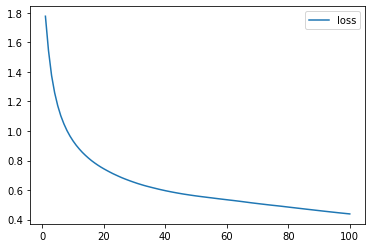

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

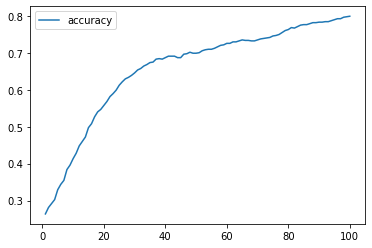

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 334us/step - loss: 0.5008 - accuracy: 0.6920
Epoch 2/100
24/24 [==============================] - 0s 292us/step - loss: 0.4757 - accuracy: 0.7173
Epoch 3/100
24/24 [==============================] - 0s 334us/step - loss: 0.4531 - accuracy: 0.7813
Epoch 4/100
24/24 [==============================] - 0s 292us/step - loss: 0.4332 - accuracy: 0.8453
Epoch 5/100
24/24 [==============================] - 0s 292us/step - loss: 0.4158 - accuracy: 0.8627
Epoch 6/100
24/24 [==============================] - 0s 292us/step - loss: 0.4005 - accuracy: 0.8640
Epoch 7/100
24/24 [==============================] - 0s 292us/step - loss: 0.3870 - accuracy: 0.8653
Epoch 8/100
24/24 [==============================] - 0s 292us/step - loss: 0.3748 - accuracy: 0.8653
Epoch 9/100
24/24 [==============================] - 0s 292us/step - loss: 0.3640 - accuracy: 0.8653
Epoch 10/100
24/24 [==============================] - 0s 292us/step - loss: 0.3543 - accura

24/24 [==============================] - 0s 334us/step - loss: 0.2139 - accuracy: 0.9053
Epoch 82/100
24/24 [==============================] - 0s 334us/step - loss: 0.2125 - accuracy: 0.9053
Epoch 83/100
24/24 [==============================] - 0s 292us/step - loss: 0.2111 - accuracy: 0.9053
Epoch 84/100
24/24 [==============================] - 0s 292us/step - loss: 0.2097 - accuracy: 0.9053
Epoch 85/100
24/24 [==============================] - 0s 292us/step - loss: 0.2084 - accuracy: 0.9067
Epoch 86/100
24/24 [==============================] - 0s 334us/step - loss: 0.2069 - accuracy: 0.9080
Epoch 87/100
24/24 [==============================] - 0s 292us/step - loss: 0.2052 - accuracy: 0.9080
Epoch 88/100
24/24 [==============================] - 0s 292us/step - loss: 0.2038 - accuracy: 0.9107
Epoch 89/100
24/24 [==============================] - 0s 334us/step - loss: 0.2022 - accuracy: 0.9120
Epoch 90/100
24/24 [==============================] - 0s 292us/step - loss: 0.2008 - accuracy: 

<AxesSubplot:>

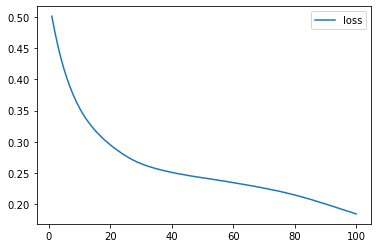

In [23]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(new_fit_model.history, index=range(1,len(new_fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

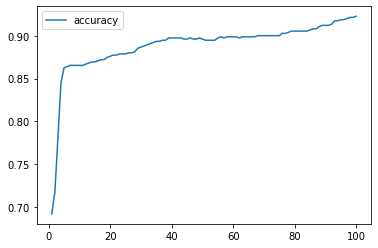

In [24]:
# Plot the accuracy
history_df.plot(y="accuracy")